<a href="https://colab.research.google.com/github/sujal-prakash15/Machine_learning/blob/master/k_means_clustering_high_dimensional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

## Importing the libraries

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
df=pd.read_csv('/content/drive/MyDrive/K means/Mall_Customers.csv')

In [102]:
print(df)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [103]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
X=df.iloc[:,2:].values
# X=np.array(ct.fit_transform(x))
print(X)

[[ 19  15  39]
 [ 21  15  81]
 [ 20  16   6]
 [ 23  16  77]
 [ 31  17  40]
 [ 22  17  76]
 [ 35  18   6]
 [ 23  18  94]
 [ 64  19   3]
 [ 30  19  72]
 [ 67  19  14]
 [ 35  19  99]
 [ 58  20  15]
 [ 24  20  77]
 [ 37  20  13]
 [ 22  20  79]
 [ 35  21  35]
 [ 20  21  66]
 [ 52  23  29]
 [ 35  23  98]
 [ 35  24  35]
 [ 25  24  73]
 [ 46  25   5]
 [ 31  25  73]
 [ 54  28  14]
 [ 29  28  82]
 [ 45  28  32]
 [ 35  28  61]
 [ 40  29  31]
 [ 23  29  87]
 [ 60  30   4]
 [ 21  30  73]
 [ 53  33   4]
 [ 18  33  92]
 [ 49  33  14]
 [ 21  33  81]
 [ 42  34  17]
 [ 30  34  73]
 [ 36  37  26]
 [ 20  37  75]
 [ 65  38  35]
 [ 24  38  92]
 [ 48  39  36]
 [ 31  39  61]
 [ 49  39  28]
 [ 24  39  65]
 [ 50  40  55]
 [ 27  40  47]
 [ 29  40  42]
 [ 31  40  42]
 [ 49  42  52]
 [ 33  42  60]
 [ 31  43  54]
 [ 59  43  60]
 [ 50  43  45]
 [ 47  43  41]
 [ 51  44  50]
 [ 69  44  46]
 [ 27  46  51]
 [ 53  46  46]
 [ 70  46  56]
 [ 19  46  55]
 [ 67  47  52]
 [ 54  47  59]
 [ 63  48  51]
 [ 18  48  59]
 [ 43  48 

## Using the elbow method to find the optimal number of clusters

In [104]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

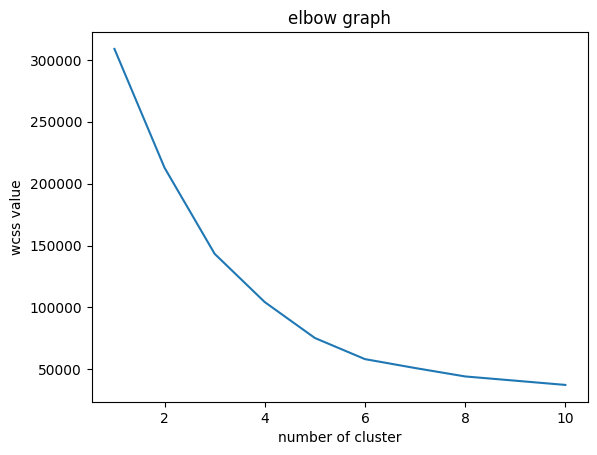

In [105]:
plt.plot(range(1,11),wcss)
plt.title('elbow graph')
plt.xlabel('number of cluster')
plt.ylabel('wcss value')
plt.show()#optimal cluster K=5 for this test case

## Training the K-Means model on the dataset

In [112]:
kmeans1=KMeans(n_clusters=6,init="k-means++",random_state=42)
y_kmeans=kmeans1.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [113]:
print(y_kmeans)

[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 2 3 0 4 0 3 2 4 4 4 2 4 4 2 2 2 2 2 4 2 2 4 2 2 2 4 2 2 4 4 2 2 2 2
 2 4 2 4 4 2 2 4 2 2 4 2 2 4 4 2 2 4 2 4 4 4 2 4 2 4 4 2 2 4 2 4 2 2 2 2 2
 4 4 4 4 4 2 2 2 2 4 4 4 1 4 1 5 1 5 1 5 1 4 1 5 1 5 1 5 1 5 1 4 1 5 1 5 1
 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5
 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1]


## Visualising the clusters

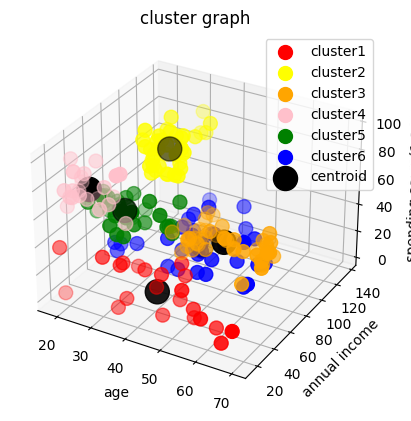

In [114]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],X[y_kmeans==0,2],s=100,color='red',label='cluster1')
ax.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],X[y_kmeans==1,2],s=100,color='yellow',label='cluster2')
ax.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],X[y_kmeans==2,2],s=100,color='orange',label='cluster3')
ax.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],X[y_kmeans==3,2],s=100,color='pink',label='cluster4')
ax.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],X[y_kmeans==4,2],s=100,color='green',label='cluster5')
ax.scatter(X[y_kmeans==5,0],X[y_kmeans==5,1],X[y_kmeans==5,2],s=100,color='blue',label='cluster6')
# ax.scatter(X[y_kmeans==6,0],X[y_kmeans==6,1],X[y_kmeans==6,2],s=100,color='blue',label='cluster7')
# ax.scatter(X[y_kmeans==7,0],X[y_kmeans==7,1],X[y_kmeans==7,2],s=100,color='blue',label='cluster8')
ax.scatter(kmeans1.cluster_centers_[:,0],kmeans1.cluster_centers_[:,1],kmeans1.cluster_centers_[:,2],s=300,color='black',label='centroid')
plt.title('cluster graph')
ax.set_xlabel('age')
ax.set_ylabel('annual income')
ax.set_zlabel('spending score(1-100)')
ax.legend()
plt.show()